

# Transaction Data Visulaization
It is done by python


In [ ]:
# load the data
import pandas as pd
data=pd.read_csv("/content/Burgerme Analysis - Sheet1.csv")
# finding the different way of payment
categ_bey=data['bezahlen'].unique()
categ_bey

the result will be:


```
array(['takeaway', 'ubereats', 'Woltv2', 'Paypal', 'bar', 'creditcard',
       'giropay', 'sofort'], dtype=object)```



In [ ]:
# our classification is [0:'takeaway', 1:'ubereats', 2:'Woltv2', 3:'Paypal', 4:'bar', 5:'creditcard',6:'giropay', 7:'sofort']
data["bezahlen_Encoder"]=pd.factorize(data['bezahlen'])[0]
# Now we make our data reorder by a increasing order of price to find a box-plot in general
data_sorted = data.sort_values("Price")
data_sorted.head()

In [ ]:
# relation between price and payment method
sns.boxplot(x="bezahlen", y='Price', data=data_sorted).set_title("relation between price VS payment way")
plt.yticks([])
plt.show()

the result will be sth like this
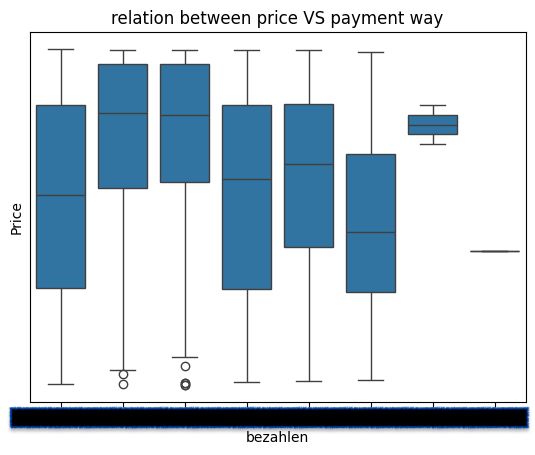

The next result will be:

In [ ]:
# relation between price and code adress
da=data["Code-Adress"].unique()
data_sorted["Code-Adress"]=data["Code-Adress"].astype(str)
sns.boxplot(x="Code-Adress", y="Price", data=data_sorted)
plt.yticks([])
plt.show()

since our payment method is discontinous i use the pie/chart to show better how payment distribute in these method. (hows the distribution of a categorical variable)

by "data["bezahlen"].value_counts()" we computes the frequency (count) of each unique payment method in the bezahlen column


[ ]


In [ ]:
# more reult about code adress and payment method
plt.pie(data["bezahlen"].value_counts(),labels=data["bezahlen"].unique(),autopct="%1.1f%%")
plt.show()

the resu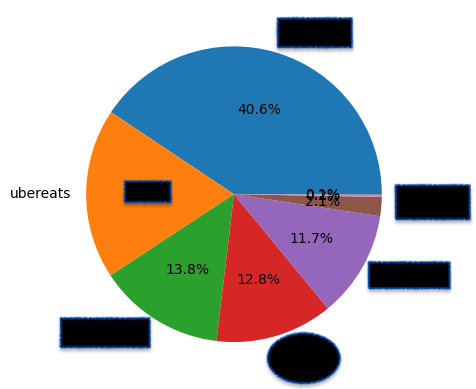lt will be like this.


In [ ]:
plt.pie(data["Code-Adress"].value_counts(),labels=data["Code-Adress"].unique(),autopct="%1.1f%%")
plt.show()

In [ ]:
#first of all we want to find total sales of food type in this chart we have in this 1003 sample how much of each food sold.
food_type=data[['BBQ', 'Big-Annus', 'Meatfree ',
       'grilled chicken', 'Other ham', 'Classic', 'TinyFood']]
food_count=food_type.sum()
food_count.T.plot(kind="bar")
plt.title('Presence of Food Types Across Samples')
plt.xlabel('Food Type')
plt.ylabel('sum Count')

# Display the chart
plt.show()

In [ ]:
# what about each sample
ax=food_type.T.plot(kind="bar",stacked=True)
ax.get_legend().remove()
plt.title('Presence of Food Types Across Samples(each color refer to one sample from 1003 sample)')
plt.xlabel('Food Type')
plt.ylabel('Presence Count (1=Present, 0=Absent)')
# Display the chart
plt.show()

the result will be sth like this 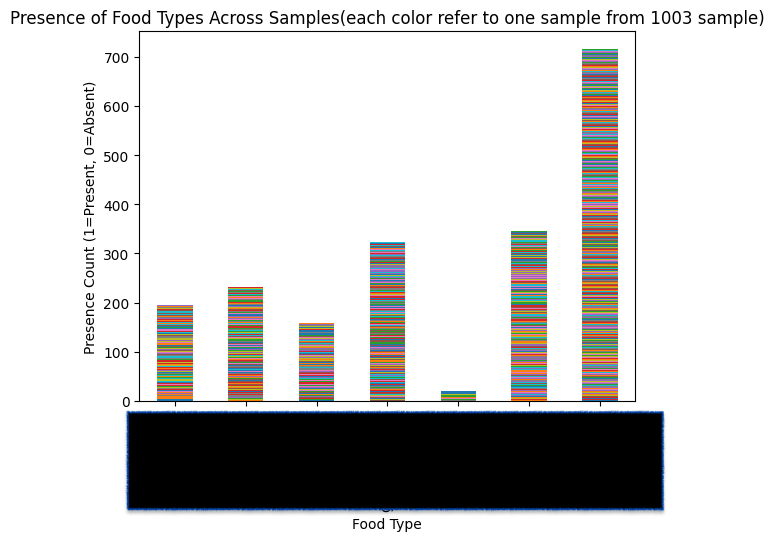

Now i want to show the correlation between different food types ordered . This could reveal patterns, like whether customers who order BBQ also tend to order TINY FOOD. i want to use **heatmap** for this.

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(food_type, cmap="YlGnBu", annot=True, cbar=True)

In [ ]:
data_sorted["food_veriaty"]=data_sorted[['BBQ', 'Big-Annus', 'Meatfree ', 'grilled chicken', 'Other ham', 'Classic', 'TinyFood']].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x= "food_veriaty", y= "Price", data=data_sorted)
plt.yticks([])
plt.show()


last step find the ammount of correlation

In [ ]:
# Step 1: Replace commas with dots in the Price column
data_sorted['Price'] = data_sorted['Price'].str.replace(',', '.')

# Step 2: Convert the Price column to numeric
data_sorted['Price'] = pd.to_numeric(data_sorted['Price'])

# Step 3: Calculate the correlation
correlation = data_sorted['Price'].corr(data_sorted['food_veriaty'])
print(correlation)
